# Multiple Linear Regression



## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Student_Performance.csv')

## EDA Steps

In [3]:
dataset.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
dataset.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [6]:
dataset.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [7]:
dataset.describe(include = object)

,Extracurricular Activities
count,10000
unique,2
top,No
freq,5052


## Preprocessing Steps

### 1. Preparing Data as input and output

In [33]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [34]:
print(X)

[[7 99 'Yes' 9 1]
 [4 82 'No' 4 2]
 [8 51 'Yes' 7 2]
 ...
 [6 83 'Yes' 8 5]
 [9 97 'Yes' 7 0]
 [7 74 'No' 8 1]]


### 2. Encoding categorical data

In [35]:
dataset['Extracurricular Activities'].value_counts()

Extracurricular Activities
No     5052
Yes    4948
Name: count, dtype: int64

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct= ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[2])],remainder='passthrough')
X=np.array (ct.fit_transform(X))

In [37]:
print(X)

[[0.0 1.0 7 99 9 1]
 [1.0 0.0 4 82 4 2]
 [0.0 1.0 8 51 7 2]
 ...
 [0.0 1.0 6 83 8 5]
 [0.0 1.0 9 97 7 0]
 [1.0 0.0 7 74 8 1]]


### 3. Splitting the dataset into the Training set and Test set

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2 ,
                                                    random_state = 0)

In [39]:
X_train.shape

(8000, 6)

## Training the Multiple Linear Regression model on the Training set

In [40]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [41]:
# check th attribute of our model
print("Coefficient of our model", regressor.coef_)
print("intercept  of our model", regressor.intercept_)

Coefficient of our model [-0.33265173  0.33265173  2.85191442  1.01886667  0.47682996  0.18776637]
intercept  of our model -33.742556490415794


In [42]:
# score of our model 
print("Training Accuracy of our model", regressor.score(X_train, y_train))
print("Testing Accuracy of our model", regressor.score(X_test, y_test))

Training Accuracy of our model 0.9889033042773491
Testing Accuracy of our model 0.9880686410711422


## Predicting the Test set results

In [43]:
y_pred = regressor.predict(X_test)
print(y_test)
print(y_pred)

[53. 50. 80. ... 66. 27. 21.]
[50.45128503 53.09379171 78.24502652 ... 64.56863194 25.89718776
 18.82598463]


## Making a single prediction (for example the Performance Index of a Student with Hours Studied = 6, Previous Scores = 86, Extracurricular Activities = 0, Sleep Hours = 6 and Sample Question Papers Practiced = 3)

In [45]:
print(regressor.predict([[0,1,6,86,6,3]]))

[74.74839416]


##Getting the final linear regression equation with the values of the coefficients

## variance score: 1 means perfect prediction 

In [46]:
print('Variance score: {}'.format(regressor.score(X_test, y_test))) 

Variance score: 0.9880686410711422


In above example, we determine accuracy score using Explained Variance Score.

We define:
**explained_variance_score = 1 – Var{y – y’}/Var{y}**

where  
* y’ is the estimated target output,
* y the corresponding (correct) target output
* Var is Variance, the square of the standard deviation.

***The best possible score is 1.0, lower values are worse.**

# plot for residual error 
  
## setting plot style 

In [47]:
plt.style.use('fivethirtyeight') 

## plotting residual errors in training data

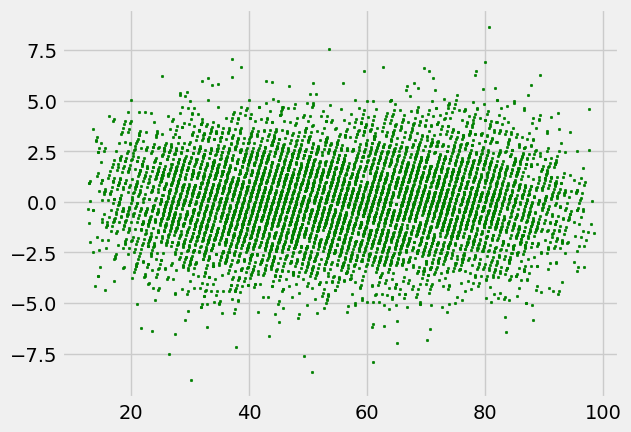

In [49]:
plt.scatter(regressor.predict(X_train), 
            regressor.predict(X_train) - y_train,
            color = "green", s = 3, label = 'Train data') 

## plotting residual errors in test data 

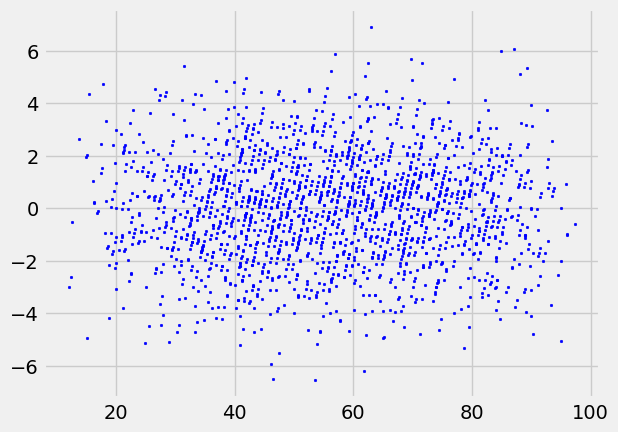

In [50]:
plt.scatter(regressor.predict(X_test), 
            regressor.predict(X_test) - y_test,
            color = "blue", s = 3, label = 'Test data') 

## plotting line for zero residual error 

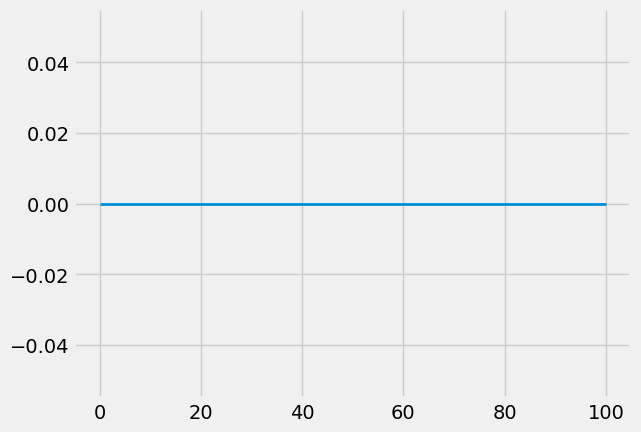

In [53]:
plt.hlines(y = 0, xmin = 0, xmax = 100 , linewidth = 2) 

## plotting legend 

C:\Users\Pavan\AppData\Local\Temp\ipykernel_9904\3738487734.py:1: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc = 'upper right')


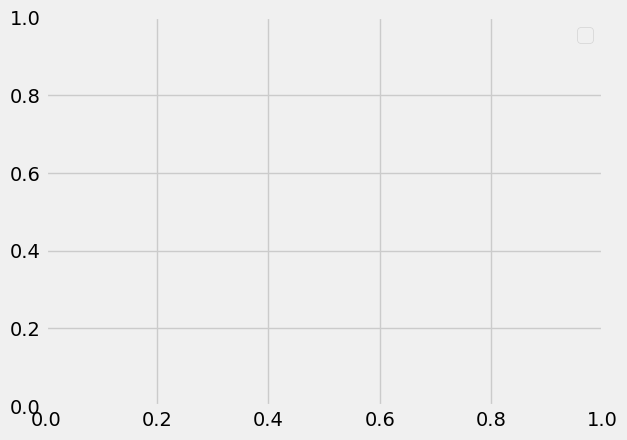

In [54]:
plt.legend(loc = 'upper right') 

## plot title 

Text(0.5, 1.0, 'Residual errors')

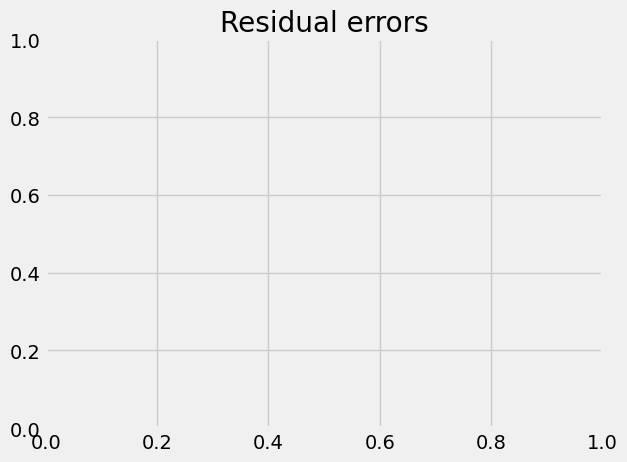

In [55]:
plt.title("Residual errors") 

## function to show plot 

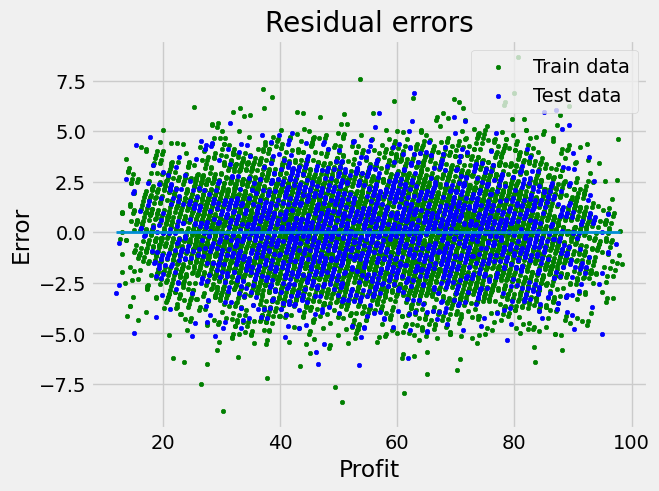

In [58]:
plt.style.use('fivethirtyeight') 
plt.scatter(regressor.predict(X_train), regressor.predict(X_train) - y_train,color = "green", s = 10, label = 'Train data') 
plt.scatter(regressor.predict(X_test), regressor.predict(X_test) - y_test,color = "blue", s = 10, label = 'Test data') 
plt.hlines(y = 0, xmin = 12, xmax = 98, linewidth = 2) 
plt.legend(loc = 'upper right') 
plt.title("Residual errors") 
plt.xlabel("Profit")
plt.ylabel("Error")
plt.show() 

### EVALUATING A MODEL USING R2 METRIC

#### Find the R^2 

In [59]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9880686410711422
